In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ANACONDA\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('uber-raw-data-apr14.csv')

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [6]:
def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

def get_day(dt):
    return dt.day


df['weekday']=df['Date/Time'].map(get_weekday)

df['hour']=df['Date/Time'].map(get_hour)

df['day']=df['Date/Time'].map(get_day)
df.tail()

,Date/Time,Lat,Lon,Base,weekday,hour,day
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2,23,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2,23,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2,23,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2,23,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,2,23,30


In [7]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,hour,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,0,1


Text(0.5, 1.0, 'FREQUENCY CHART OF BOOKED RIDES')

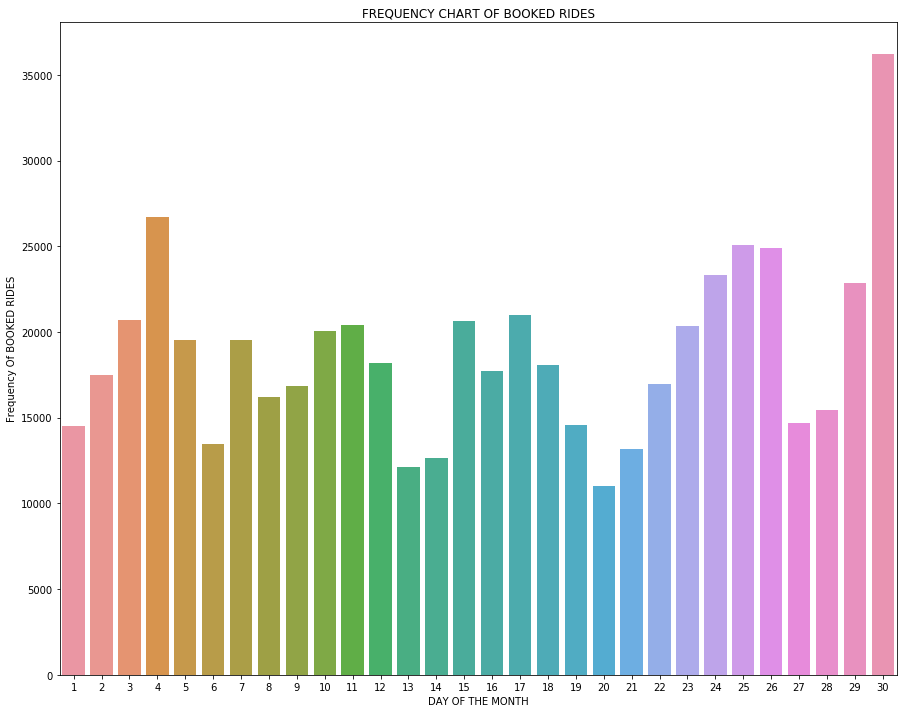

In [8]:
fig=plt.figure(figsize=(15,12))
sns.countplot(df['day'])
plt.ylabel('Frequency Of BOOKED RIDES')
plt.xlabel('DAY OF THE MONTH')
plt.title('FREQUENCY CHART OF BOOKED RIDES')

In [9]:
date=df.groupby('day').count()['Date/Time']

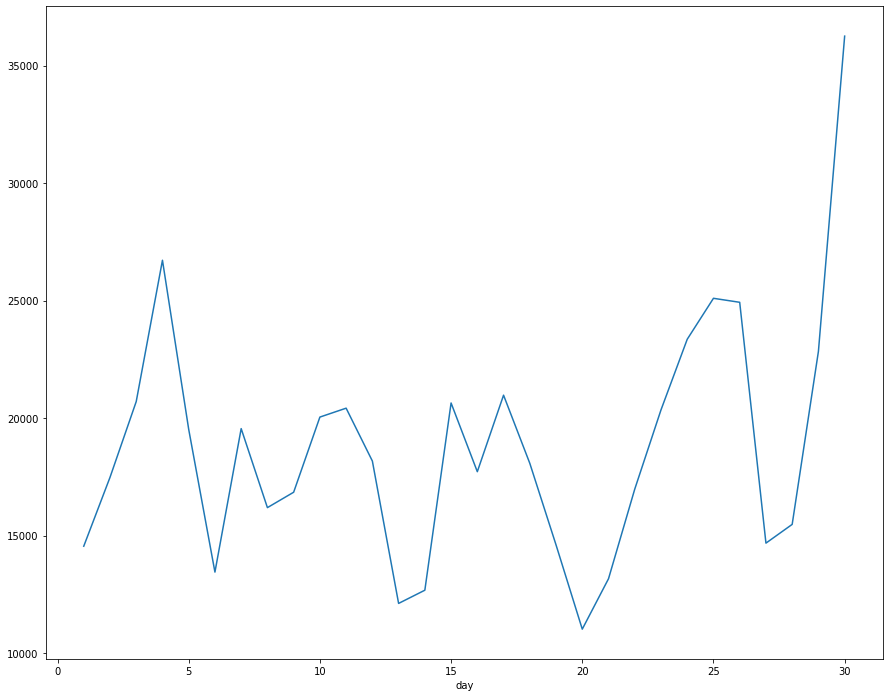

In [10]:
fig=plt.figure(figsize=(15,12))
date.plot()

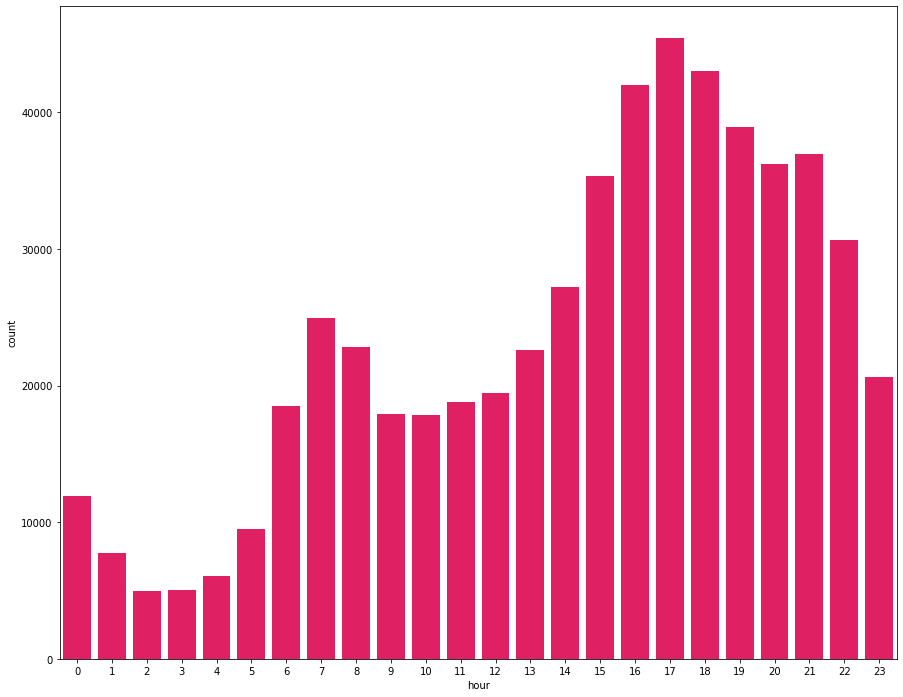

In [13]:
fig=plt.figure(figsize=(15,12))
sns.countplot(df['hour'],color='#FF0059')

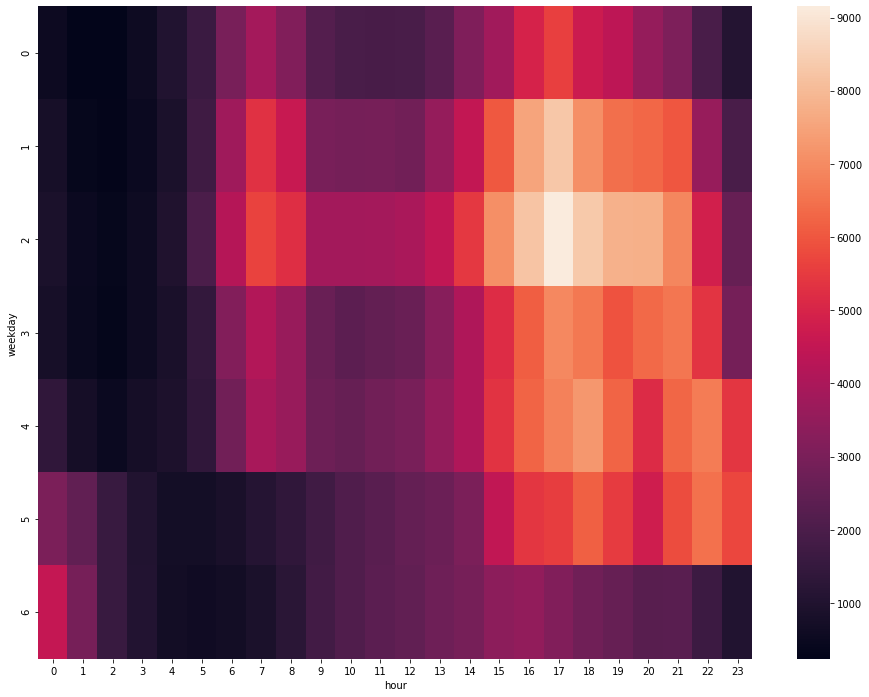

In [34]:
plt.figure(figsize=(16,12))
cross=df.groupby(['weekday','hour']).count()['day'].unstack()
sns.heatmap(cross)

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


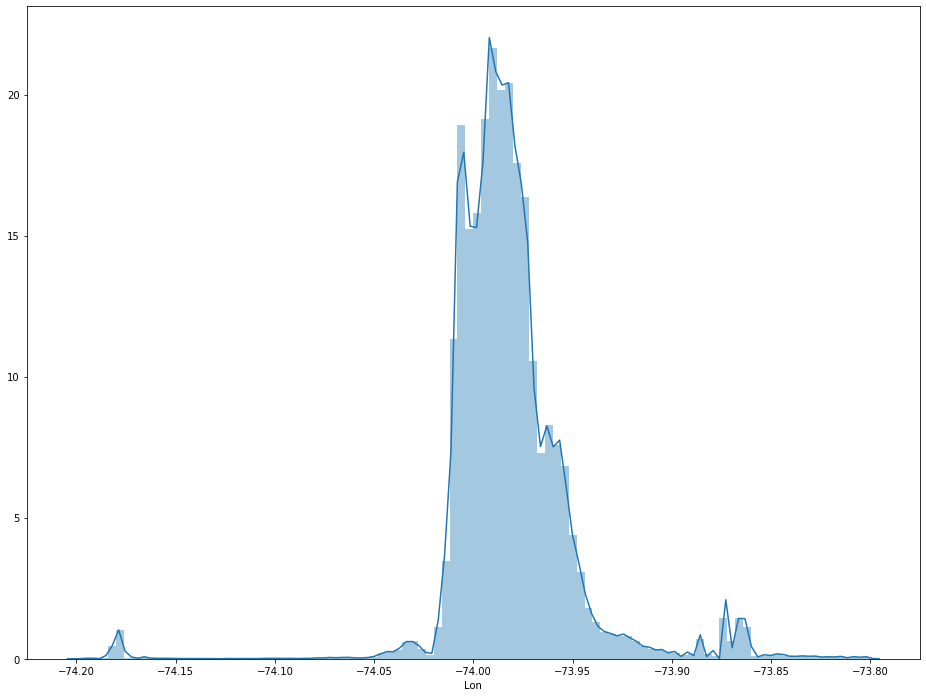

In [51]:
plt.figure(figsize=(16,12))
temp=df[df['Lon']<=-73.8][(df['Lon']>=-74.2)]['Lon']
sns.distplot(temp,bins=100)

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


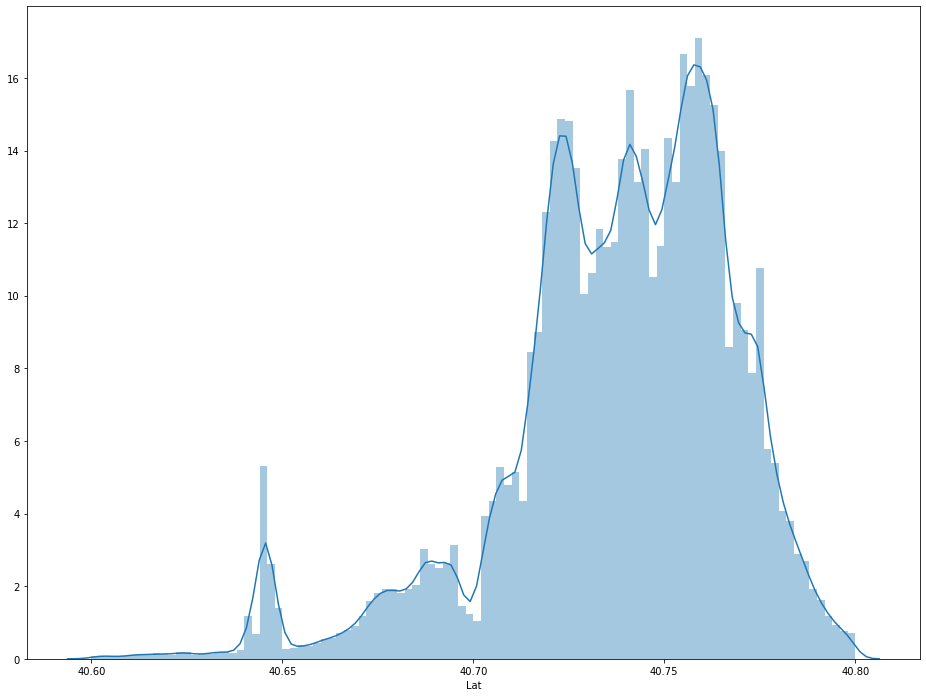

In [54]:
plt.figure(figsize=(16,12))
temp=df[df['Lat']<=40.8][(df['Lat']>=40.6)]['Lat']
sns.distplot(temp,bins=100)

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


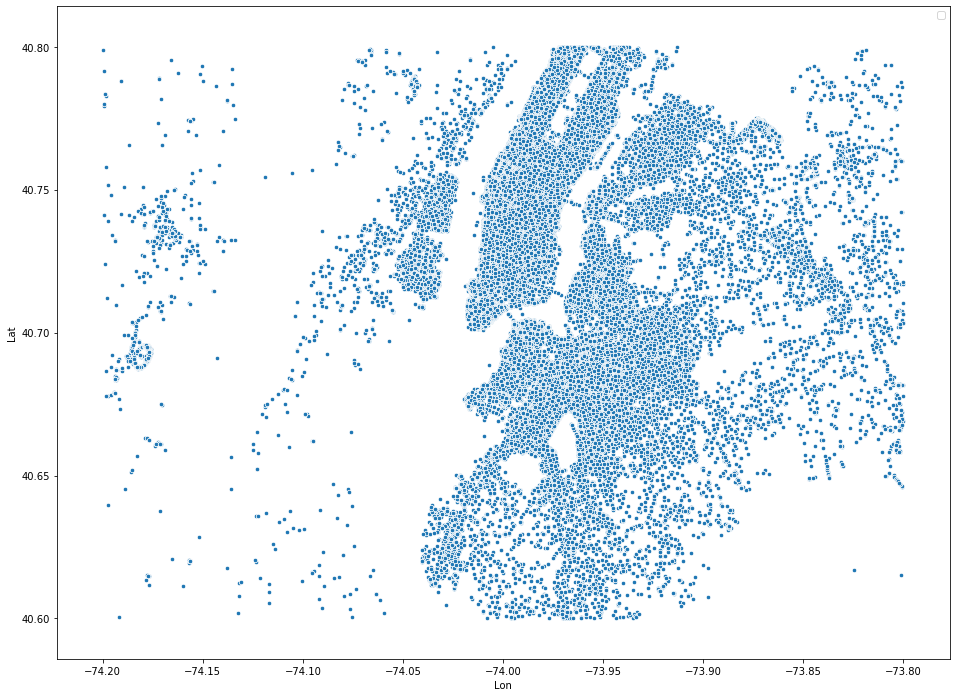

In [71]:
plt.figure(figsize=(16,12))
temp=df[df['Lat']<=40.8][(df['Lat']>=40.6)]
temp=temp[temp['Lon']<=-73.8][(temp['Lon']>=-74.2)]
sns.scatterplot(temp['Lon'],temp['Lat'],s=20)
plt.legend();

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


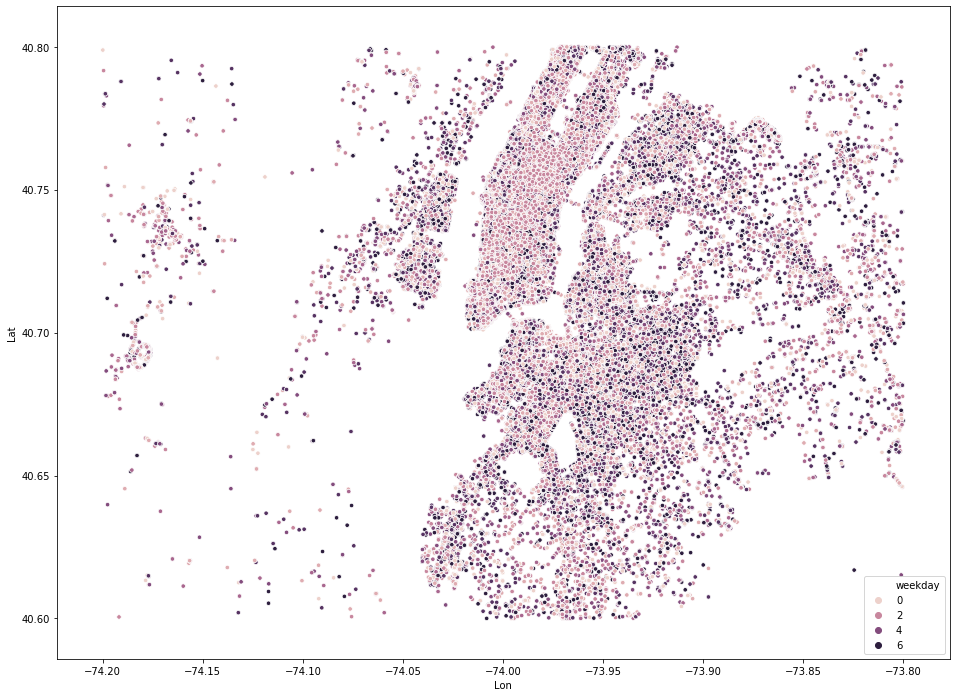

In [73]:
plt.figure(figsize=(16,12))
temp=df[df['Lat']<=40.8][(df['Lat']>=40.6)]
temp=temp[temp['Lon']<=-73.8][(temp['Lon']>=-74.2)]
sns.scatterplot(temp['Lon'],temp['Lat'],s=20,hue=temp['weekday'])
plt.legend();